In [ ]:
!pip install pystan~=2.14
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 42.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61827099 sha256=35fa1bd0abf5087df35a4d4cdef172541e300f987c038021279685629b4f4475
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9435548 sha256=dbbfcff0454888547157fefdcd1cc058166901db6dcc9dddf455f77564fc94a2
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [ ]:
#read dataset with pandas from the link to the dataset

url = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'

df = pd.read_csv(url)
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [ ]:
# convert the FullDate column to a pandas DatetimeIndex
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace=True)

In [ ]:
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [ ]:

# resample the data to daily frequency and sum the values
daily_df = df.resample('D').sum()

daily_df


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


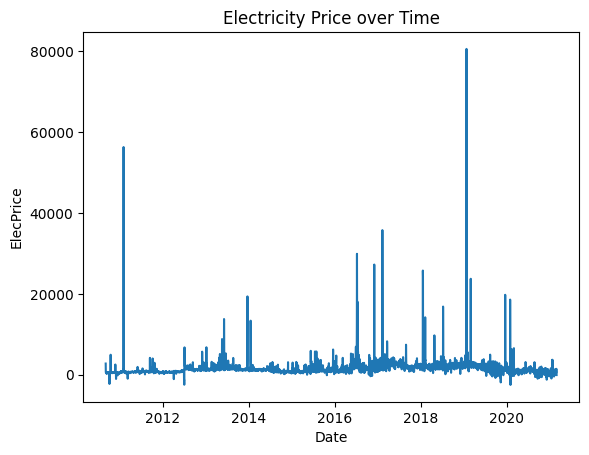

In [ ]:
# plot the ElecPrice column over time
plt.plot(daily_df['ElecPrice'])
plt.title('Electricity Price over Time')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.show()


In [ ]:

# perform ADF test on SysLoad column
result_sysload = adfuller(daily_df['SysLoad'])
pvalue_sysload = result_sysload[1]

# perform ADF test on GasPrice column
result_gasprice = adfuller(daily_df['GasPrice'])
pvalue_gasprice = result_gasprice[1]

# print the p-values
print(f"SysLoad p-value: {pvalue_sysload:.6f}")
print(f"GasPrice p-value: {pvalue_gasprice:.6f}")

SysLoad p-value: 0.004254
GasPrice p-value: 0.045027


In [ ]:

# perform ADF test on GasPrice column
result_gasprice = adfuller(df['GasPrice'])
critval_gasprice_10 = result_gasprice[4]['10%']
critval_gasprice_5 = result_gasprice[4]['5%']

# perform ADF test on ElecPrice column
result_elecprice = adfuller(df['ElecPrice'])
critval_elecprice_10 = result_elecprice[4]['10%']
critval_elecprice_5 = result_elecprice[4]['5%']

# print the critical values
print(f"GasPrice 10% critical value: {critval_gasprice_10:.4f}")
print(f"GasPrice 5% critical value: {critval_gasprice_5:.4f}")
print(f"ElecPrice 10% critical value: {critval_elecprice_10:.4f}")
print(f"ElecPrice 5% critical value: {critval_elecprice_5:.4f}")

GasPrice 10% critical value: -2.5668
GasPrice 5% critical value: -2.8616
ElecPrice 10% critical value: -2.5668
ElecPrice 5% critical value: -2.8616


QUESTIONS 14-16

MODEL TRAINNG AND EVALUATION

In [ ]:
daily_df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [ ]:
daily_df_copy = daily_df.copy().reset_index()
daily_df_copy =  daily_df_copy[['FullDate', 'ElecPrice']].rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y'})
daily_df_copy

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [ ]:
#Split dataset into train(first 2757) and test (x-2757), where x = length of dataset
x_train, x_test = daily_df_copy[:2757], daily_df_copy[2757:]
y_train, y_test = daily_df_copy.y[:2757], daily_df_copy.y[2757:]
     

In [ ]:
#Train model 
model = Prophet()
model.fit(x_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
#Predict using the length of test dataset
future = model.make_future_dataframe(len(x_test), freq = 'D')
y_pred = model.predict(future)
y_pred.head()

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,849.455287,-1528.970480,3288.124739,849.455287,849.455287,143.855508,143.855508,143.855508,159.362662,159.362662,159.362662,-15.507154,-15.507154,-15.507154,0.0,0.0,0.0,993.310795
1,2010-09-02,849.407108,-1324.372522,3524.780804,849.407108,849.407108,224.160554,224.160554,224.160554,257.120465,257.120465,257.120465,-32.959911,-32.959911,-32.959911,0.0,0.0,0.0,1073.567661
2,2010-09-03,849.358928,-1489.265901,3200.096195,849.358928,849.358928,-0.874031,-0.874031,-0.874031,50.276079,50.276079,50.276079,-51.150110,-51.150110,-51.150110,0.0,0.0,0.0,848.484897
3,2010-09-04,849.310749,-1843.121190,2800.643269,849.310749,849.310749,-341.197592,-341.197592,-341.197592,-271.455104,-271.455104,-271.455104,-69.742488,-69.742488,-69.742488,0.0,0.0,0.0,508.113157
4,2010-09-05,849.262569,-1922.125377,2856.006227,849.262569,849.262569,-431.170926,-431.170926,-431.170926,-342.740678,-342.740678,-342.740678,-88.430247,-88.430247,-88.430247,0.0,0.0,0.0,418.091644


In [ ]:
y_pred_test = y_pred.iloc[2757:,]['yhat']


# calculate the mean absolute error
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('mean_absolute_percentage_error:',(mape))

mean_absolute_percentage_error: 5.447579467573114


In [ ]:
mse = mean_squared_error(y_test, y_pred_test)

rmse = np.sqrt(mse)

print('root_mean_squared_error:',round(rmse,2))



root_mean_squared_error: 3208.17


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


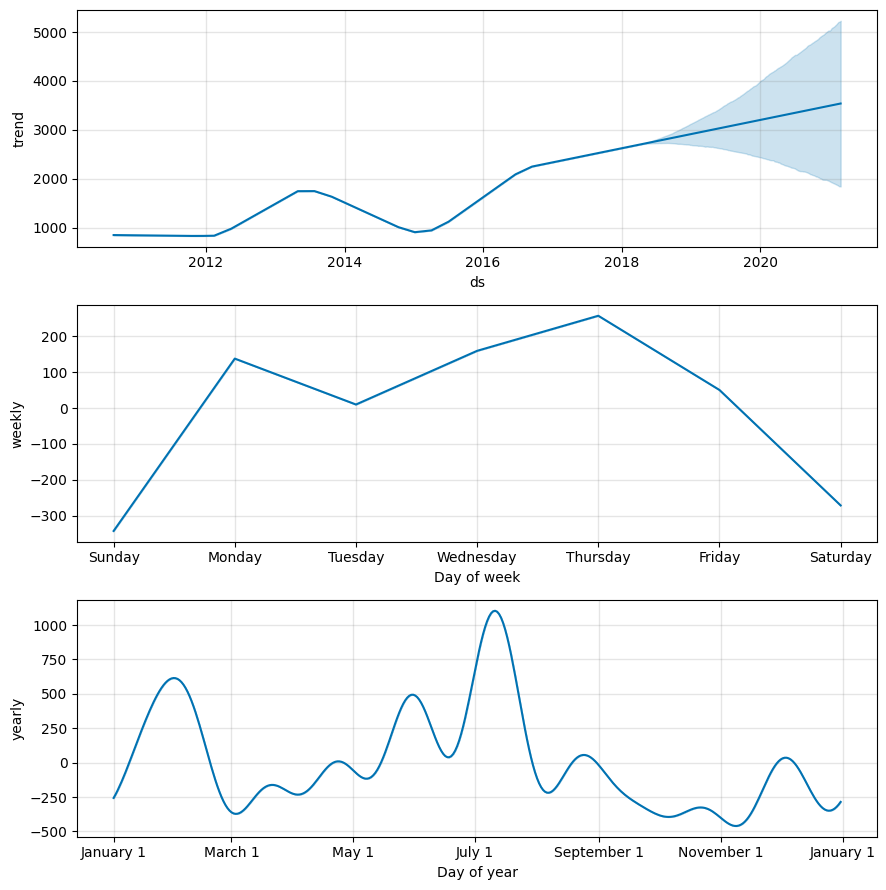

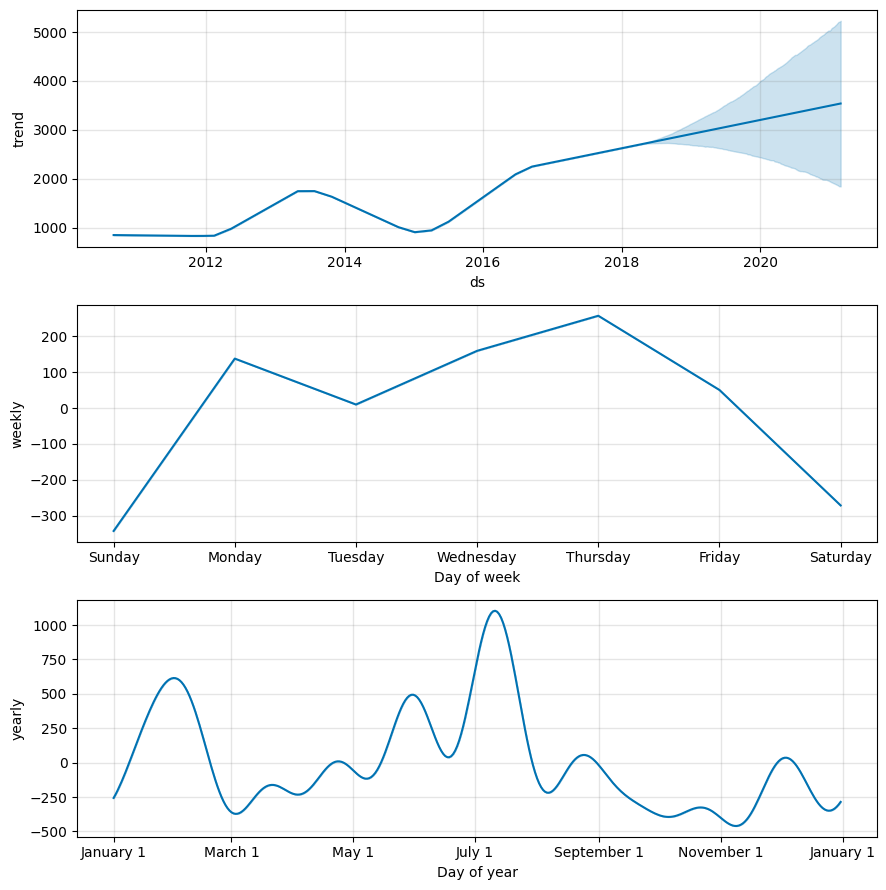

In [ ]:
model.plot_components(y_pred)

SECOND MODEL TRAINING

In [ ]:
#using regressors (SysLoad, Tmax and GasPrice as add1, add2 and add3 respectively)
new_df = daily_df.copy().reset_index()
new_df = new_df.rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y', 'SysLoad' : 'add1', 'Tmax' : 'add2', 'GasPrice' : 'add3'})
new_df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
#Split dataset as done previously
new_X_train, new_X_test = new_df[:2757], new_df[2757:]
new_y_train, new_y_test = new_df.y[:2757], new_df.y[2757:]
new_X_train.isnull().sum()

ds      0
add2    0
add1    0
add3    0
y       0
dtype: int64

In [ ]:
#Training model while adding the regressors into the dataset
reg_model = Prophet()
reg_model.add_regressor('add1')
reg_model.add_regressor('add2')
reg_model.add_regressor('add3')
reg_model.fit(new_X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
future_reg = reg_model.make_future_dataframe(periods = len(new_X_test), freq = 'D')
future_reg['add1'] = new_X_train['add1']
future_reg['add2'] = new_X_train['add2']
future_reg['add3'] = new_X_train['add3']
future_reg.head()

,ds,add1,add2,add3
0,2010-09-01,41565.380,379.2,88.56
1,2010-09-02,38898.990,369.6,88.56
2,2010-09-03,41665.760,439.2,106.80
3,2010-09-04,35638.085,328.8,81.36
4,2010-09-05,35611.410,357.6,106.80


In [ ]:
forwardfill_future_reg = future_reg.fillna(method='ffill')
future_pred = reg_model.predict(forwardfill_future_reg)
future_pred

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,986.942796,-607.959318,3813.478055,986.942796,986.942796,1037.682314,1037.682314,1037.682314,0.246705,...,42.464782,42.464782,42.464782,-4.708018,-4.708018,-4.708018,0.0,0.0,0.0,1505.573630
1,2010-09-02,987.579533,-841.849044,3596.067836,987.579533,987.579533,888.616491,888.616491,888.616491,0.247554,...,145.644179,145.644179,145.644179,-7.595749,-7.595749,-7.595749,0.0,0.0,0.0,1457.437060
2,2010-09-03,988.216269,-601.676379,4024.078965,988.216269,988.216269,1043.294106,1043.294106,1043.294106,0.241401,...,-44.281544,-44.281544,-44.281544,-10.543767,-10.543767,-10.543767,0.0,0.0,0.0,1687.531546
3,2010-09-04,988.853005,-1268.716013,3151.720321,988.853005,988.853005,706.314020,706.314020,706.314020,0.251160,...,-117.551645,-117.551645,-117.551645,-13.281867,-13.281867,-13.281867,0.0,0.0,0.0,901.874451
4,2010-09-05,989.489742,-862.333344,3578.563390,989.489742,989.489742,704.822741,704.822741,704.822741,0.248614,...,-69.529936,-69.529936,-69.529936,-15.567063,-15.567063,-15.567063,0.0,0.0,0.0,1320.069178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,2609.495718,331.590005,4701.826805,1792.144109,3389.816822,-797.917250,-797.917250,-797.917250,0.230581,...,42.464782,42.464782,42.464782,-433.590888,-433.590888,-433.590888,0.0,0.0,0.0,2488.253933
3830,2021-02-25,2610.189136,235.584683,4909.207384,1791.794596,3391.732628,-797.917250,-797.917250,-797.917250,0.230581,...,145.644179,145.644179,145.644179,-460.023258,-460.023258,-460.023258,0.0,0.0,0.0,2565.694378
3831,2021-02-26,2610.882555,87.898371,4593.872324,1791.113548,3393.648434,-797.917250,-797.917250,-797.917250,0.230581,...,-44.281544,-44.281544,-44.281544,-480.685226,-480.685226,-480.685226,0.0,0.0,0.0,2355.800106
3832,2021-02-27,2611.575973,-147.180615,4672.215408,1790.785675,3395.564240,-797.917250,-797.917250,-797.917250,0.230581,...,-117.551645,-117.551645,-117.551645,-495.339016,-495.339016,-495.339016,0.0,0.0,0.0,2268.569632


In [ ]:
future_pred = future_pred.iloc[2757:,]['yhat']


# calculate the mean absolute error
mape = mean_absolute_percentage_error(new_y_test, future_pred)
print('mean_absolute_percentage_error:',(mape))

mean_absolute_percentage_error: 4.427153829379369


In [ ]:
mse = mean_squared_error(new_y_test, future_pred)

rmse = np.sqrt(mse)

print('root_mean_squared_error:',round(rmse,2))

root_mean_squared_error: 3015.4


In [ ]:
reg_model.plot_components(future_pred)